In [2]:
# libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.model_selection import train_test_split # for train-test split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for categorical encoding
from sklearn.compose import ColumnTransformer # for combining transformations
from sklearn.pipeline import Pipeline # for creating a pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # for evaluation metrics
from sklearn.metrics import roc_auc_score, roc_curve # for ROC curve and AUC
import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import cross_val_predict # for cross-validation predictions
from sklearn.linear_model import LogisticRegressionCV # for cross-validated logistic regression
from sklearn.model_selection import StratifiedKFold # for stratified fold cross-validation
from sklearn.base import clone # for cloning models
from sklearn.model_selection import RepeatedStratifiedKFold # for repeated stratified fold cross-validation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import joblib








In [3]:
# Load data
master_df = pd.read_csv('C:\\Users\\Hassan\\Documents\\Projects\\baard\\baard_master_sheet.csv')


# make variable had_fall if total_number_falls > 0
master_df['had_fall'] = (master_df['total_number_falls'] > 0).astype(int)

# add new varaible BMI_extremer, where 1 = bmi > 40 or < 20, binary variables
master_df['BMI_extreme'] = ((master_df['bmi'] > 40) | (master_df['bmi'] < 20)).astype(int)

 
ON_both = master_df[master_df['medication_group'].isin(["ARIPIPRAZOLE", "BUPROPION"])]

ON_arp = master_df[master_df['medication_group'] == "ARIPIPRAZOLE"]

ON_bup = master_df[master_df['medication_group'] == "BUPROPION"]




In [4]:
## prepare the data for modeling -- demographic variables + clin + cog

## new clin demo variables = age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',
                ## add to models and see difference

ON_bup_cog = ON_bup.dropna(subset=['MTOTALIS_01'])
ON_bup_cog = ON_bup_cog[~ON_bup_cog['record_id'].str.startswith('CU')]
#select the demographic columns and cog columns
ON_bup_cog = ON_bup_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']].dropna()
ON_arp_cog = ON_arp.dropna(subset=['MTOTALIS_01'])
ON_arp_cog = ON_arp_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']].dropna()

ON_arp_cog = ON_arp_cog[~ON_arp_cog['record_id'].str.startswith('CU')]

## prepare the data for modeling -- demographic variables + clin + nih cog

ON_bup_nih =ON_bup.dropna(subset=['fcc_baseline'])
ON_bup_nih = ON_bup_nih[~ON_bup_nih['record_id'].str.startswith('CU')]
ON_bup_nih = ON_bup_nih[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']].dropna()



ON_arp_nih =ON_arp.dropna(subset=['fcc_baseline'])
ON_arp_nih = ON_arp_nih[~ON_arp_nih['record_id'].str.startswith('CU')]
ON_arp_nih = ON_arp_nih[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']]

#select the demographic columns and cog columns
ON_arp_cog = ON_arp_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']]

## prepare the data for modeling -- demographis + clin + blood 
ON_bup_blood = ON_bup[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','IL-6_sqrt', 'gp130_sqrt', 'IL-8/CXCL8_sqrt', 'uPAR_sqrt', 'MIF_sqrt',
        'CCL2/JE/MCP-1_sqrt', 'Osteoprotegerin/TNFRSF11B_sqrt', 'IL-1 beta/IL-1F2_sqrt',
        'CCL20/MIP-3 alpha_sqrt', 'CCL3/MIP-1 alpha_sqrt', 'CCL4/MIP-1 beta_sqrt',
        'CCL13/MCP-4_sqrt', 'GM-CSF_sqrt', 'ICAM-1/CD54_sqrt', 'TNF RII/TNFRSF1B_sqrt',
        'TNF RI/TNFRSF1A_sqrt', 'PIGF_sqrt', 'CXCL1/GRO alpha/KC/CINC-1_sqrt',
        'IGFBP-2_sqrt', 'TIMP-1_sqrt', 'IGFBP-6_sqrt', 'Angiogenin_sqrt']].dropna()
ON_bup_blood = ON_bup_blood[~ON_bup_blood['record_id'].str.startswith('CU')]
ON_arp_blood = ON_arp[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status','IL-6_sqrt', 'gp130_sqrt', 'IL-8/CXCL8_sqrt', 'uPAR_sqrt', 'MIF_sqrt',
        'CCL2/JE/MCP-1_sqrt', 'Osteoprotegerin/TNFRSF11B_sqrt', 'IL-1 beta/IL-1F2_sqrt',
        'CCL20/MIP-3 alpha_sqrt', 'CCL3/MIP-1 alpha_sqrt', 'CCL4/MIP-1 beta_sqrt',
        'CCL13/MCP-4_sqrt', 'GM-CSF_sqrt', 'ICAM-1/CD54_sqrt', 'TNF RII/TNFRSF1B_sqrt',
        'TNF RI/TNFRSF1A_sqrt', 'PIGF_sqrt', 'CXCL1/GRO alpha/KC/CINC-1_sqrt',
        'IGFBP-2_sqrt', 'TIMP-1_sqrt', 'IGFBP-6_sqrt', 'Angiogenin_sqrt']].dropna()
ON_arp_blood = ON_arp_blood[~ON_arp_blood['record_id'].str.startswith('CU')]

## prepare the data for modeling -- demographic variables + smri
ON_bup_smri = ON_bup.dropna(subset=['Right.Amygdala_etiv'])
# select the demographics and smri columns
ON_bup_smri = ON_bup_smri[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme'

] + list(ON_bup_smri.loc[:, 'WM.hypointensities_log':'Default_to_DorsAttn'].columns)] # change Right.Amygdala_etiv to DorsAttn, to get smri in addition to basic within network connectivity or Default_to_DorsAttn to get within network and network by network

ON_arp_smri = ON_arp.dropna(subset=['Right.Amygdala_etiv'])
# select the demographics and smri columns
ON_arp_smri = ON_arp_smri[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme'] + list(ON_arp_smri.loc[:, 'WM.hypointensities_log':'Default_to_DorsAttn'].columns)] # change Right.Amygdala_etiv to DorsAttn, to get smri in addition to basic within network connectivity or Default_to_DorsAttn to get within network and network by network




ON_bup_cog_smri = ON_bup.dropna(subset=['MTOTALIS_01', 'Right.Amygdala_etiv'])

In [389]:
# corrtest between bmi and BMI_extreme
print("Correlation between bmi and BMI_extreme:", df['mini_6'].corr(df['years_with_depression']))

Correlation between bmi and BMI_extreme: 0.30747818893038525


In [256]:
# make a list of all clin variabeles
clin_vars = ['age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status', 'bmi', 'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme' ]

Iteration 1/50 — Train size: 114, Test size: 29
Iteration 2/50 — Train size: 114, Test size: 29
Iteration 3/50 — Train size: 114, Test size: 29
Iteration 4/50 — Train size: 114, Test size: 29
Iteration 5/50 — Train size: 114, Test size: 29
Iteration 6/50 — Train size: 114, Test size: 29
Iteration 7/50 — Train size: 114, Test size: 29
Iteration 8/50 — Train size: 114, Test size: 29
Iteration 9/50 — Train size: 114, Test size: 29
Iteration 10/50 — Train size: 114, Test size: 29
Iteration 11/50 — Train size: 114, Test size: 29
Iteration 12/50 — Train size: 114, Test size: 29
Iteration 13/50 — Train size: 114, Test size: 29
Iteration 14/50 — Train size: 114, Test size: 29
Iteration 15/50 — Train size: 114, Test size: 29
Iteration 16/50 — Train size: 114, Test size: 29
Iteration 17/50 — Train size: 114, Test size: 29
Iteration 18/50 — Train size: 114, Test size: 29
Iteration 19/50 — Train size: 114, Test size: 29
Iteration 20/50 — Train size: 114, Test size: 29
Iteration 21/50 — Train size:

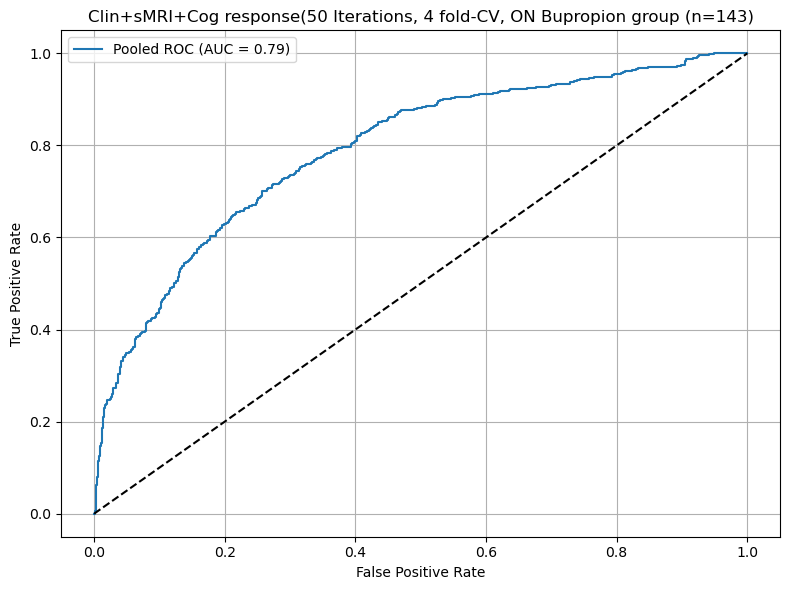

In [13]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_bup_cog.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',   'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01']].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01']].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',  'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01'  ]


#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.27 # threshold for classification, 0.27 is the threshold where sensitivity and specificity are balanced
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []
per_fold_preds = []

# loop over outter folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    test_ids = df.iloc[test_idx]['record_id'].values

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=4,
        l1_ratios=[0.1] ,
        scoring='neg_log_loss',
        max_iter=1000000)
    clf.fit(X_train, y_train)

    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)
    # find balanced accuracy
    balanced_accuracy = (sensitivity + specificity) / 2



    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Balanced Accuracy': balanced_accuracy
    })
    # NEW: save per-fold predictions with record_id
    per_fold_preds.append(pd.DataFrame({
        'iteration': fold_num + 1,
        'record_id': test_ids,
        'y_true': y_test,
        'y_score': y_score,       # probability of remission
        'y_pred': y_pred
    }))

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")


print(f'Balanced Accuracy: {balanced_accuracy:.3f}')


#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# average balanced accuracy
average_balanced_accuracy = df_metrics['Balanced Accuracy'].mean()
print(f"Average Balanced Accuracy: {average_balanced_accuracy:.3f}")

#  pooled results
pooled_auc = roc_auc_score(all_y_true, all_y_scores)
fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)

print(f"\nPooled AUC: {pooled_auc:.3f}")
print("\nAverage per-fold metrics:")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].mean())

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Pooled ROC (AUC = {pooled_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Clin+sMRI+Cog response({n_splits} Iterations, 4 fold-CV, ON Bupropion group (n={len(df)})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
df_coefs.to_csv("ON_arp_nih_coefs.csv", index=False)

In [10]:
# make fold metrics a DataFrame
df_metrics = pd.DataFrame(fold_metrics)

df_metrics.to_csv('bup_clin_per_fold_metrics.csv', index=False)

In [ ]:
df_preds = pd.concat(per_fold_preds, ignore_index=True)

oof_by_id = (df_preds.groupby('record_id', as_index=False)
             .agg(mean_prob=('y_score','mean'),
                  std_prob=('y_score','std'),
                  times_tested=('y_score','size'),
                  y_true=('y_true','first'))
             .sort_values('mean_prob', ascending=False))
# oof_by_id has exactly one row per record_id with their OOS probability


PermissionError: [Errno 13] Permission denied: 'ON_bup_cog_predictions.csv'

In [15]:

# save results
oof_by_id.to_csv('ON_bup_cog_predictions.csv', index=False)



In [74]:


# save the model
joblib.dump(clf, 'BAARD_bup_clin_model.joblib')


['BAARD_bup_clin_model.joblib']

In [17]:
df_coefs.to_csv("/Users/hassanabdulrasul/Documents/Projects/suicide_modeling/on_bup_mri_clin_clinonly.csv", index=False)
df_metrics.to_csv("/Users/hassanabdulrasul/Documents/Projects/suicide_modeling/on_bup_mri_clin_clinonly_metrics.csv", index=False)

In [65]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_arp.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',   'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',  'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',  ]


#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=5,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])


Iteration 1/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 2/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 3/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 4/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 5/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 6/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 7/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 8/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 9/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 10/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 11/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 12/50 — Train size: 131, Test size: 33
Best C: 10.000

In [ ]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    #
# np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C

df = ON_arp_smri.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
#df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
#df = df.dropna(subset=['mini_addtl_q1', 'mini_6'])
df = df[['age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status'
]].dropna()

X = df[['age', 'sex', 'edu_lvl', 'baseline_madrs'
]].values
y = df['remission_status'].astype(int).values
feature_names = ['age', 'sex', 'edu_lvl', 'baseline_madrs']

#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[0.1],
        cv=5,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])




Iteration 1/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 2/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 3/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 4/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 5/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 6/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 7/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 8/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 9/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 10/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 11/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
Iteration 12/50 — Train size: 62, Test size: 16
Best C: 1.000, Best l1_ratio: 0.100
I

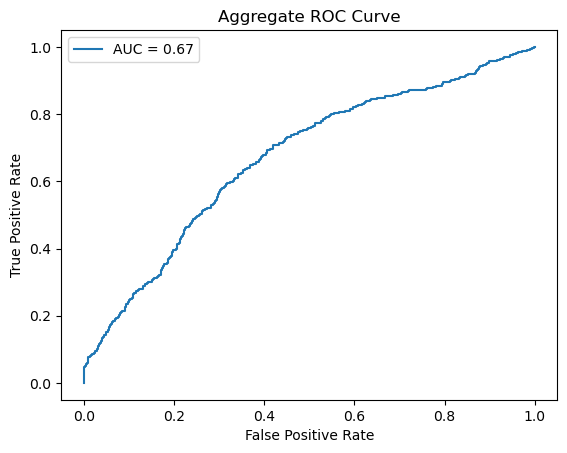

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(all_y_true, all_y_scores):.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Aggregate ROC Curve")
plt.legend()


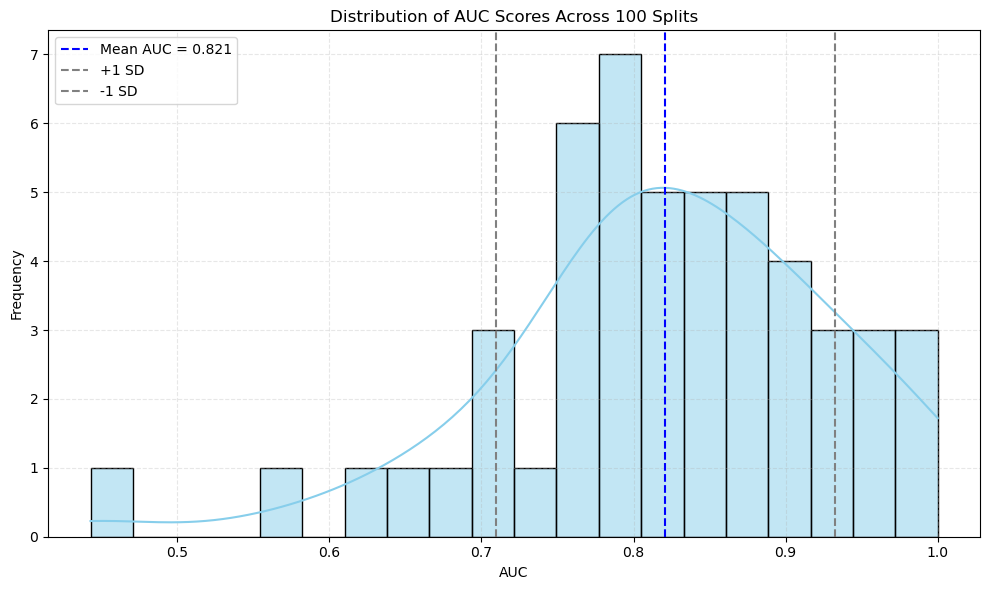

In [14]:


plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['AUC'], kde=True, bins=20, color='skyblue')

# Mean and ±1 SD lines
mean_auc = df_metrics['AUC'].mean()
std_auc = df_metrics['AUC'].std()

plt.axvline(mean_auc, color='blue', linestyle='--', label=f"Mean AUC = {mean_auc:.3f}")
plt.axvline(mean_auc + std_auc, color='gray', linestyle='--', label='+1 SD')
plt.axvline(mean_auc - std_auc, color='gray', linestyle='--', label='-1 SD')

plt.title("Distribution of AUC Scores Across 100 Splits")
plt.xlabel("AUC")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

sss = StratifiedShuffleSplit(n_splits=100, test_size=0.25, random_state=42)

all_y_true = []
all_y_score = []
all_y_pred = []
fold_metrics = []

for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Fold {fold_num+1}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        C=10,
        l1_ratio=0.1,
        max_iter=100000
    )
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.3).astype(int)  # or use 0.5 depending on your earlier threshold

    all_y_true.extend(y_test)
    all_y_score.extend(y_prob)
    all_y_pred.extend(y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0

    fold_metrics.append({
        'Fold': fold_num + 1,
        'AUC': auc,
        'Accuracy': acc,
        'Sensitivity': sens,
        'Specificity': spec
    })

# Convert to DataFrame
import pandas as pd
df_metrics = pd.DataFrame(fold_metrics)
print("\n=== Performance Summary (mean ± std) ===")
print(df_metrics[['AUC', 'Accuracy', 'Sensitivity', 'Specificity']].agg(['mean', 'std']).round(3))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
Fold 15
Fold 16
Fold 17
Fold 18
Fold 19
Fold 20
Fold 21
Fold 22
Fold 23
Fold 24
Fold 25
Fold 26
Fold 27
Fold 28
Fold 29
Fold 30
Fold 31
Fold 32
Fold 33
Fold 34
Fold 35
Fold 36
Fold 37
Fold 38
Fold 39
Fold 40
Fold 41
Fold 42
Fold 43
Fold 44
Fold 45
Fold 46
Fold 47
Fold 48
Fold 49
Fold 50
Fold 51
Fold 52
Fold 53
Fold 54
Fold 55
Fold 56
Fold 57
Fold 58
Fold 59
Fold 60
Fold 61
Fold 62
Fold 63
Fold 64
Fold 65
Fold 66
Fold 67
Fold 68
Fold 69
Fold 70
Fold 71
Fold 72
Fold 73
Fold 74
Fold 75
Fold 76
Fold 77
Fold 78
Fold 79
Fold 80
Fold 81
Fold 82
Fold 83
Fold 84
Fold 85
Fold 86
Fold 87
Fold 88
Fold 89
Fold 90
Fold 91
Fold 92
Fold 93
Fold 94
Fold 95
Fold 96
Fold 97
Fold 98
Fold 99
Fold 100

=== Performance Summary (mean ± std) ===
        AUC  Accuracy  Sensitivity  Specificity
mean  0.775     0.680        0.791        0.606
std   0.107     0.095        0.142        0.138


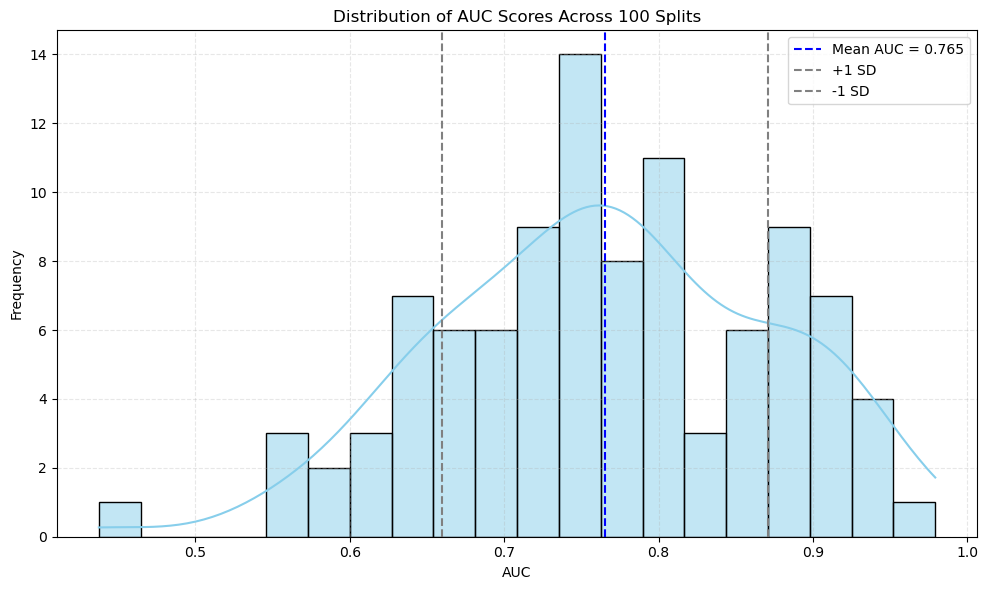

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual DataFrame if needed
# df_metrics = pd.DataFrame(fold_metrics)  # if not already defined

plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['AUC'], kde=True, bins=20, color='skyblue')

# Mean and ±1 SD lines
mean_auc = df_metrics['AUC'].mean()
std_auc = df_metrics['AUC'].std()

plt.axvline(mean_auc, color='blue', linestyle='--', label=f"Mean AUC = {mean_auc:.3f}")
plt.axvline(mean_auc + std_auc, color='gray', linestyle='--', label='+1 SD')
plt.axvline(mean_auc - std_auc, color='gray', linestyle='--', label='-1 SD')

plt.title("Distribution of AUC Scores Across 100 Splits")
plt.xlabel("AUC")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [179]:
import numpy as np

auc_vals = df_metrics['AUC'].values
ci_lower = np.percentile(auc_vals, 2.5)
ci_upper = np.percentile(auc_vals, 97.5)

print(f"95% CI for AUC: {ci_lower:.3f} – {ci_upper:.3f}")


95% CI for AUC: 0.601 – 0.887


## all plots in one

In [59]:
blood_marker_cols = [
        'IL-6', 'gp130', 'IL-8/CXCL8', 'uPAR', 'MIF',
        'CCL2/JE/MCP-1', 'Osteoprotegerin/TNFRSF11B', 'IL-1 beta/IL-1F2',
        'CCL20/MIP-3 alpha', 'CCL3/MIP-1 alpha', 'CCL4/MIP-1 beta',
        'CCL13/MCP-4', 'GM-CSF', 'ICAM-1/CD54', 'TNF RII/TNFRSF1B',
        'TNF RI/TNFRSF1A', 'PIGF', 'CXCL1/GRO alpha/KC/CINC-1',
        'IGFBP-2', 'TIMP-1', 'IGFBP-6', 'Angiogenin'
    ]


blood_marker_sqrt_transformed_cols = [ 'IL-6_sqrt', 'gp130_sqrt', 'IL-8/CXCL8_sqrt', 'uPAR_sqrt', 'MIF_sqrt',
        'CCL2/JE/MCP-1_sqrt', 'Osteoprotegerin/TNFRSF11B_sqrt', 'IL-1 beta/IL-1F2_sqrt',
        'CCL20/MIP-3 alpha_sqrt', 'CCL3/MIP-1 alpha_sqrt', 'CCL4/MIP-1 beta_sqrt',
        'CCL13/MCP-4_sqrt', 'GM-CSF_sqrt', 'ICAM-1/CD54_sqrt', 'TNF RII/TNFRSF1B_sqrt',
        'TNF RI/TNFRSF1A_sqrt', 'PIGF_sqrt', 'CXCL1/GRO alpha/KC/CINC-1_sqrt',
        'IGFBP-2_sqrt', 'TIMP-1_sqrt', 'IGFBP-6_sqrt', 'Angiogenin_sqrt']



blood_marker_log_transformed_cols = ['age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status', 
         'IL-6_log', 'gp130_log', 'IL-8/CXCL8_log', 'uPAR_log', 'MIF_log',
        'CCL2/JE/MCP-1_log', 'Osteoprotegerin/TNFRSF11B_log', 'IL-1 beta/IL-1F2_log',
        'CCL20/MIP-3 alpha_log', 'CCL3/MIP-1 alpha_log', 'CCL4/MIP-1 beta_log',
        'CCL13/MCP-4_log', 'GM-CSF_log', 'ICAM-1/CD54_log', 'TNF RII/TNFRSF1B_log',
        'TNF RI/TNFRSF1A_log', 'PIGF_log', 'CXCL1/GRO alpha/KC/CINC-1_log',
        'IGFBP-2_log', 'TIMP-1_log', 'IGFBP-6_log', 'Angiogenin_log']

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

df = ON_arp_nih.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
#df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
#df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','remission_status','age', 'sex', 'edu_lvl', 'baseline_madrs', 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']].dropna()

# Configuration
test_ratio = 0.20
n_splits = 10
threshold = 0.35
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)
feature_set_names = [ 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']

# Storage for ROC curves
roc_results = {}

for feature_name in feature_set_names:
    print(f"\n=== Running model using feature: {feature_name} ===")
    
    X = df[['age', 'sex', 'edu_lvl', 'baseline_madrs',    feature_name]].values
    y = df['remission_status'].astype(int).values
    feature_names = ['age', 'sex', 'edu_lvl', 'baseline_madrs',   feature_name]

    all_y_true = []
    all_y_scores = []

    for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = LogisticRegressionCV(
            penalty='elasticnet',
            solver='saga',
            Cs=10,
            cv=6,
            l1_ratios=[0.1],
            scoring='neg_log_loss',
            max_iter=1000000,
            refit=True
        )
        clf.fit(X_train, y_train)

        y_score = clf.predict_proba(X_test)[:, 1]
        all_y_true.extend(y_test)
        all_y_scores.extend(y_score)

    pooled_auc = roc_auc_score(all_y_true, all_y_scores)
    fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)

    roc_results[feature_name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': pooled_auc
    }

# === BASELINE MODEL: Demographics + baseline MADRS only ===
print("\n=== Running baseline model: age + sex + edu_lvl + baseline_madrs ===")

X_base = df[['age', 'sex', 'edu_lvl', 'baseline_madrs']].values
y_base = df['remission_status'].astype(int).values

all_y_true_base = []
all_y_scores_base = []

for fold_num, (train_idx, test_idx) in enumerate(sss.split(X_base, y_base)):
    X_train_base, X_test_base = X_base[train_idx], X_base[test_idx]
    y_train_base, y_test_base = y_base[train_idx], y_base[test_idx]

    clf_base = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=10,
        cv=4,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000,
        refit=True
    )
    clf_base.fit(X_train_base, y_train_base)

 

    y_score_base = clf_base.predict_proba(X_test_base)[:, 1]
    all_y_true_base.extend(y_test_base)
    all_y_scores_base.extend(y_score_base)

# Compute ROC and AUC for baseline model
pooled_auc_base = roc_auc_score(all_y_true_base, all_y_scores_base)
fpr_base, tpr_base, _ = roc_curve(all_y_true_base, all_y_scores_base)

roc_results['Clinical only'] = {
    'fpr': fpr_base,
    'tpr': tpr_base,
    'auc': pooled_auc_base
}



=== Running model using feature: fcc_baseline ===

=== Running model using feature: dccs_baseline ===

=== Running model using feature: flanker_baseline ===

=== Running model using feature: listSort_baseline ===

=== Running model using feature: pattComp_baseline ===

=== Running model using feature: psm_baseline ===

=== Running baseline model: age + sex + edu_lvl + baseline_madrs ===


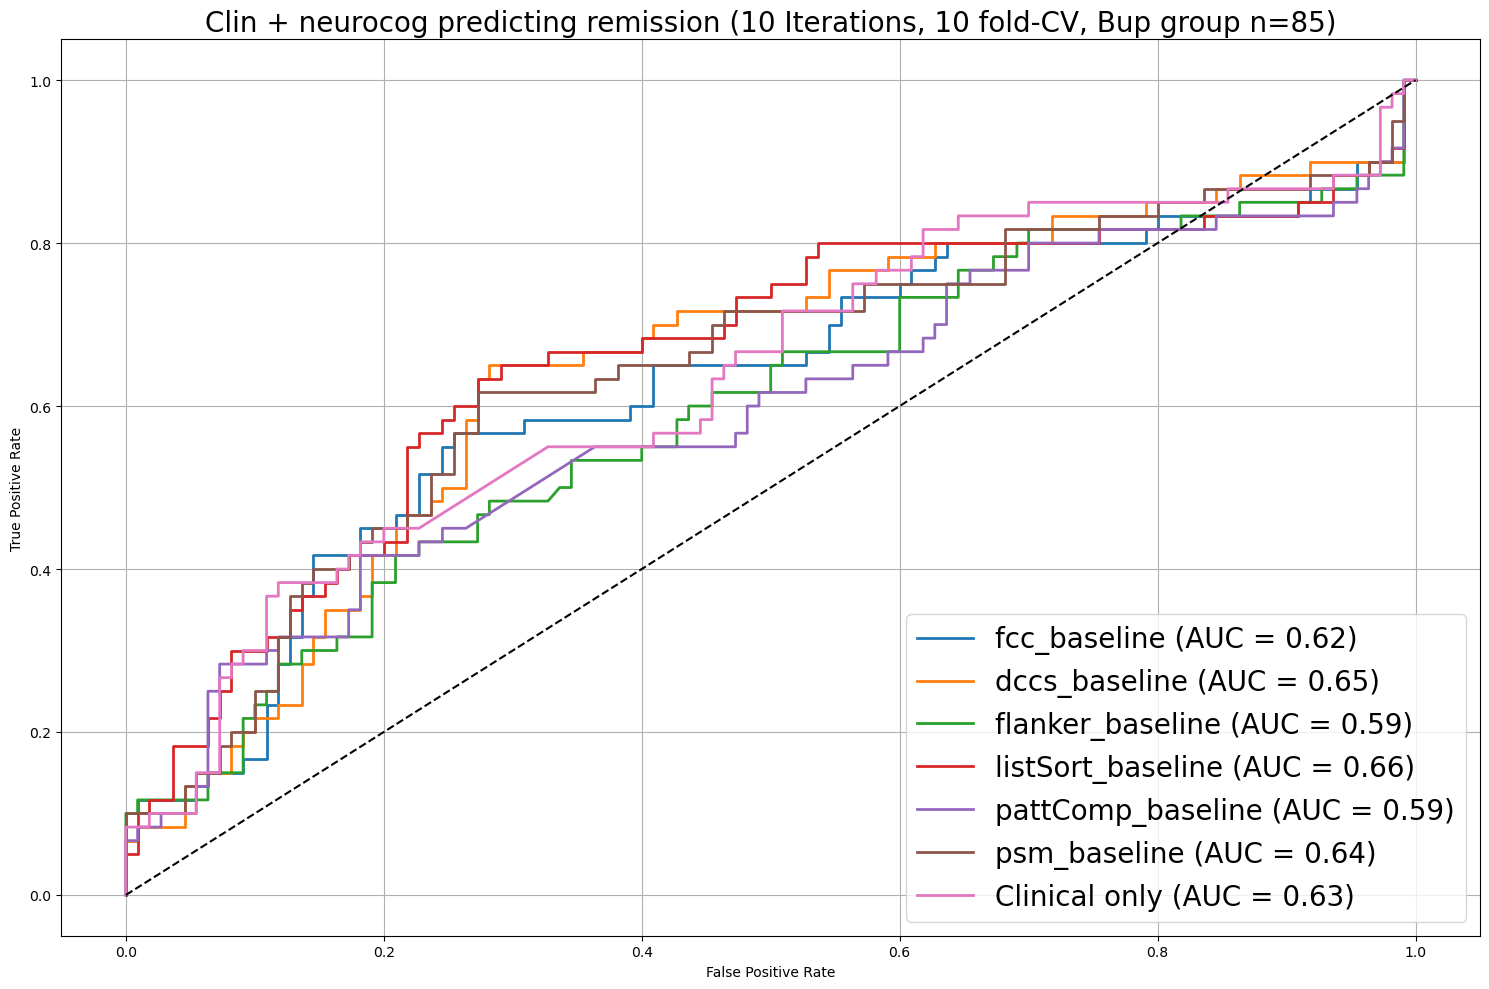

In [30]:


# === PLOT ALL ROC CURVES TOGETHER ===
plt.figure(figsize=(15, 10))


from itertools import cycle
colors = cycle(plt.cm.tab10.colors + plt.cm.Set2.colors + plt.cm.Dark2.colors)

for feature_name, result in roc_results.items():
    plt.plot(result['fpr'], result['tpr'],
             label=f'{feature_name} (AUC = {result["auc"]:.2f})',
             linewidth=2,
             color=next(colors))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Clin + neurocog predicting remission ({n_splits} Iterations, 10 fold-CV, Bup group n={len(df)})', fontsize=20)

plt.legend(fontsize =20)
plt.grid(True)
plt.tight_layout()
plt.show()

#Osteoprotegerin/TNFRSF11B_sqrt,CCL20/MIP-3 alpha_sqrt,CCL3/MIP-1 alpha_sqrt,CCL4/MIP-1 beta_sqrt,CXCL1/GRO alpha/KC/CINC-1_sqrt,TIMP-1_sqrt,IGFBP-6_sqrt,

In [66]:

# configurations 

fold_to_track = 4  # Fold 5 (0-indexed)
n_splits = 10
test_ratio = 0.1
C_values = 10
l1_ratios = [0.1]
threshold = 0.35
feature_names = ['age', 'sex', 'edu_lvl', 'baseline_madrs']
random_state = 29

# PREPROCESSING


### function to just do the preprocessing - as in, drop the nas, turn all X features to values and the Y to values too 
        ## adjust df and X if we want to add more variables

def preprocess(df, label_col='remission_status'):
    df = df[['age', 'gender', 'edu_lvl', 'baseline_madrs', label_col]].dropna().copy()
    df['sex'] = (df['gender'] == 'Male').astype(int)
    X = df[['age', 'sex', 'edu_lvl', 'baseline_madrs']].values
    y = df[label_col].astype(int).values
    return X, y, df.reset_index(drop=True)

# Example:
# X_bup, y_bup, meta_bup = preprocess(ON_bup, label_col='remission_status')
# X_arp, y_arp, meta_arp = preprocess(ON_arp, label_col='remission_status')


## model training
    ## train the model using elastic net regularization -- this is 

def train_full_model(X, y, cv_inner, model_name):
    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=C_values,
        cv=cv_inner,
        l1_ratios=l1_ratios,
        scoring='neg_log_loss',
        max_iter=1000000,
        refit=True
    )
    clf.fit(X, y)
    joblib.dump(clf, f'{model_name}.joblib') ### saves model for testing
    return clf


### evaluate a specific outter fold (we will test models on this)

def get_fold_indices(X, y, fold_id=fold_to_track, n_splits=n_splits):
    sss = list(StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=random_state).split(X, y))
    train_idx, test_idx = sss[fold_id]
    return train_idx, test_idx

def evaluate_on_test_set(model, X_test, y_test, threshold=0.35):
    y_score = model.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    auc = roc_auc_score(y_test, y_score)

    return {
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': auc,
        'y_true': y_test,
        'y_score': y_score,
        'y_pred': y_pred
    }

## run pipeline

def run_cross_model_fold_eval(ON_bup, ON_arp):
    # Preprocess both datasets
    X_bup, y_bup, meta_bup = preprocess(ON_bup, label_col='remission_status')
    X_arp, y_arp, meta_arp = preprocess(ON_arp, label_col='remission_status')

    # Get fold 5 test indices
    _, test_idx_bup = get_fold_indices(X_bup, y_bup)
    _, test_idx_arp = get_fold_indices(X_arp, y_arp)

    X_bup_test, y_bup_test = X_bup[test_idx_bup], y_bup[test_idx_bup]
    X_arp_test, y_arp_test = X_arp[test_idx_arp], y_arp[test_idx_arp]

    # Train full models
    model_bup = train_full_model(X_bup, y_bup, 10,  'model_bup_full')
    
    model_arp = train_full_model(X_arp, y_arp, 5, 'model_arp_full')

    # Evaluate both models on both test sets
    evals = {
        'bup_on_bup': evaluate_on_test_set(model_bup, X_bup_test, y_bup_test),
        'bup_on_arp': evaluate_on_test_set(model_bup, X_arp_test, y_arp_test),
        'arp_on_bup': evaluate_on_test_set(model_arp, X_bup_test, y_bup_test),
        'arp_on_arp': evaluate_on_test_set(model_arp, X_arp_test, y_arp_test),
    }

    # Organize predictions
    results_df = pd.DataFrame({
        'source_dataset': ['bup'] * len(test_idx_bup) + ['arp'] * len(test_idx_arp),
        'true_label': np.concatenate([y_bup_test, y_arp_test]),
        'model_bup_pred_prob': np.concatenate([evals['bup_on_bup']['y_score'], evals['bup_on_arp']['y_score']]),
        'model_arp_pred_prob': np.concatenate([evals['arp_on_bup']['y_score'], evals['arp_on_arp']['y_score']]),
        'model_bup_pred_label': np.concatenate([evals['bup_on_bup']['y_pred'], evals['bup_on_arp']['y_pred']]),
        'model_arp_pred_label': np.concatenate([evals['arp_on_bup']['y_pred'], evals['arp_on_arp']['y_pred']]),
        'test_idx_in_original': np.concatenate([test_idx_bup, test_idx_arp])
    })

    # Combine with metadata
    meta_test = pd.concat([
        meta_bup.iloc[test_idx_bup].reset_index(drop=True),
        meta_arp.iloc[test_idx_arp].reset_index(drop=True)
    ], ignore_index=True)

    results_df = pd.concat([meta_test, results_df], axis=1)

    # Save
    results_df.to_csv('fold5_cross_model_predictions.csv', index=False)
    print("Saved: fold5_cross_model_predictions.csv")

    return evals, results_df


In [11]:
run_cross_model_fold_eval(ON_bup, ON_arp)

Saved: fold5_cross_model_predictions.csv


({'bup_on_bup': {'TP': np.int64(4),
   'FP': np.int64(1),
   'TN': np.int64(27),
   'FN': np.int64(6),
   'Accuracy': np.float64(0.8157894736842105),
   'Sensitivity': np.float64(0.4),
   'Specificity': np.float64(0.9642857142857143),
   'AUC': np.float64(0.675),
   'y_true': array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]),
   'y_score': array([0.45382462, 0.19185273, 0.32780461, 0.20676583, 0.0867281 ,
          0.26555076, 0.49108817, 0.14381621, 0.63492061, 0.17914218,
          0.24253224, 0.30953691, 0.20830487, 0.2803918 , 0.32986994,
          0.1263592 , 0.31961917, 0.10622752, 0.14266777, 0.13054489,
          0.2037152 , 0.14966896, 0.11543552, 0.19623887, 0.14266943,
          0.30754046, 0.52845777, 0.10446489, 0.14730431, 0.08453222,
          0.27851024, 0.30754624, 0.22252131, 0.08309611, 0.30160296,
          0.06635475, 0.50745293, 0.30555983]),
   'y_pred': array([1, 0, 0, 0, 0, 0, 1, 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedShuffleSplit

df = ON_arp_smri.copy().dropna()
# dropna remission_status

df['sex'] = (df['gender'] == 'Male').astype(int)
#df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
#df = df.dropna(subset=['mini_addtl_q1', 'mini_6'])

df = df.dropna(subset=['remission_status'])
smri_cols = list(ON_bup_smri.loc[:, 'WM.hypointensities_log':'Default_to_DorsAttn'].columns)


test_ratio = 0.2
n_splits = 4
threshold = 0.35
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

roc_results = {}

# Run model for each sMRI feature individually
for smri_feature in smri_cols:
    print(f"\n=== Running model: age, sex, edu_lvl, baseline_madrs + {smri_feature} ===")
    X = df[['age', 'sex', 'edu_lvl', 'baseline_madrs',   smri_feature]].values
    y = df['remission_status'].astype(int).values

    all_y_true = []
    all_y_scores = []

    for train_idx, test_idx in sss.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf = LogisticRegressionCV(
            penalty='elasticnet',
            solver='saga',
            Cs=10,
            cv=3,
            l1_ratios=[0.1],
            scoring='neg_log_loss',
            max_iter=1000000,
            refit=True
        )
        clf.fit(X_train, y_train)
        y_score = clf.predict_proba(X_test)[:, 1]
        all_y_true.extend(y_test)
        all_y_scores.extend(y_score)

    pooled_auc = roc_auc_score(all_y_true, all_y_scores)
    fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)
    roc_results[smri_feature] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': pooled_auc
    }

# Baseline model
print("\n=== Running baseline model: age + sex + edu_lvl + baseline_madrs ===")
X_base = df[['age', 'sex', 'edu_lvl', 'baseline_madrs']].values
y_base = df['remission_status'].astype(int).values
all_y_true_base = []
all_y_scores_base = []

for train_idx, test_idx in sss.split(X_base, y_base):
    X_train_base, X_test_base = X_base[train_idx], X_base[test_idx]
    y_train_base, y_test_base = y_base[train_idx], y_base[test_idx]

    clf_base = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=10,
        cv=3,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000,
        refit=True
    )
    clf_base.fit(X_train_base, y_train_base)
    y_score_base = clf_base.predict_proba(X_test_base)[:, 1]
    all_y_true_base.extend(y_test_base)
    all_y_scores_base.extend(y_score_base)

pooled_auc_base = roc_auc_score(all_y_true_base, all_y_scores_base)
fpr_base, tpr_base, _ = roc_curve(all_y_true_base, all_y_scores_base)
roc_results['Clinical only'] = {
    'fpr': fpr_base,
    'tpr': tpr_base,
    'auc': pooled_auc_base,
    'mean_auc': np.mean([result['auc'] for result in roc_results.values()]),
}



=== Running model: age, sex, edu_lvl, baseline_madrs + WM.hypointensities_log ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_bankssts_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_caudalanteriorcingulate_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_caudalmiddlefrontal_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_cuneus_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_entorhinal_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_fusiform_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_inferiorparietal_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_inferiortemporal_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_isthmuscingulate_thickness ===

=== Running model: age, sex, edu_lvl, baseline_madrs + lh_lateraloccipital_thickness ===

=== Running model: age, sex, edu_lvl, 

C:\Users\Hassan\AppData\Local\Temp\ipykernel_29048\1869237608.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


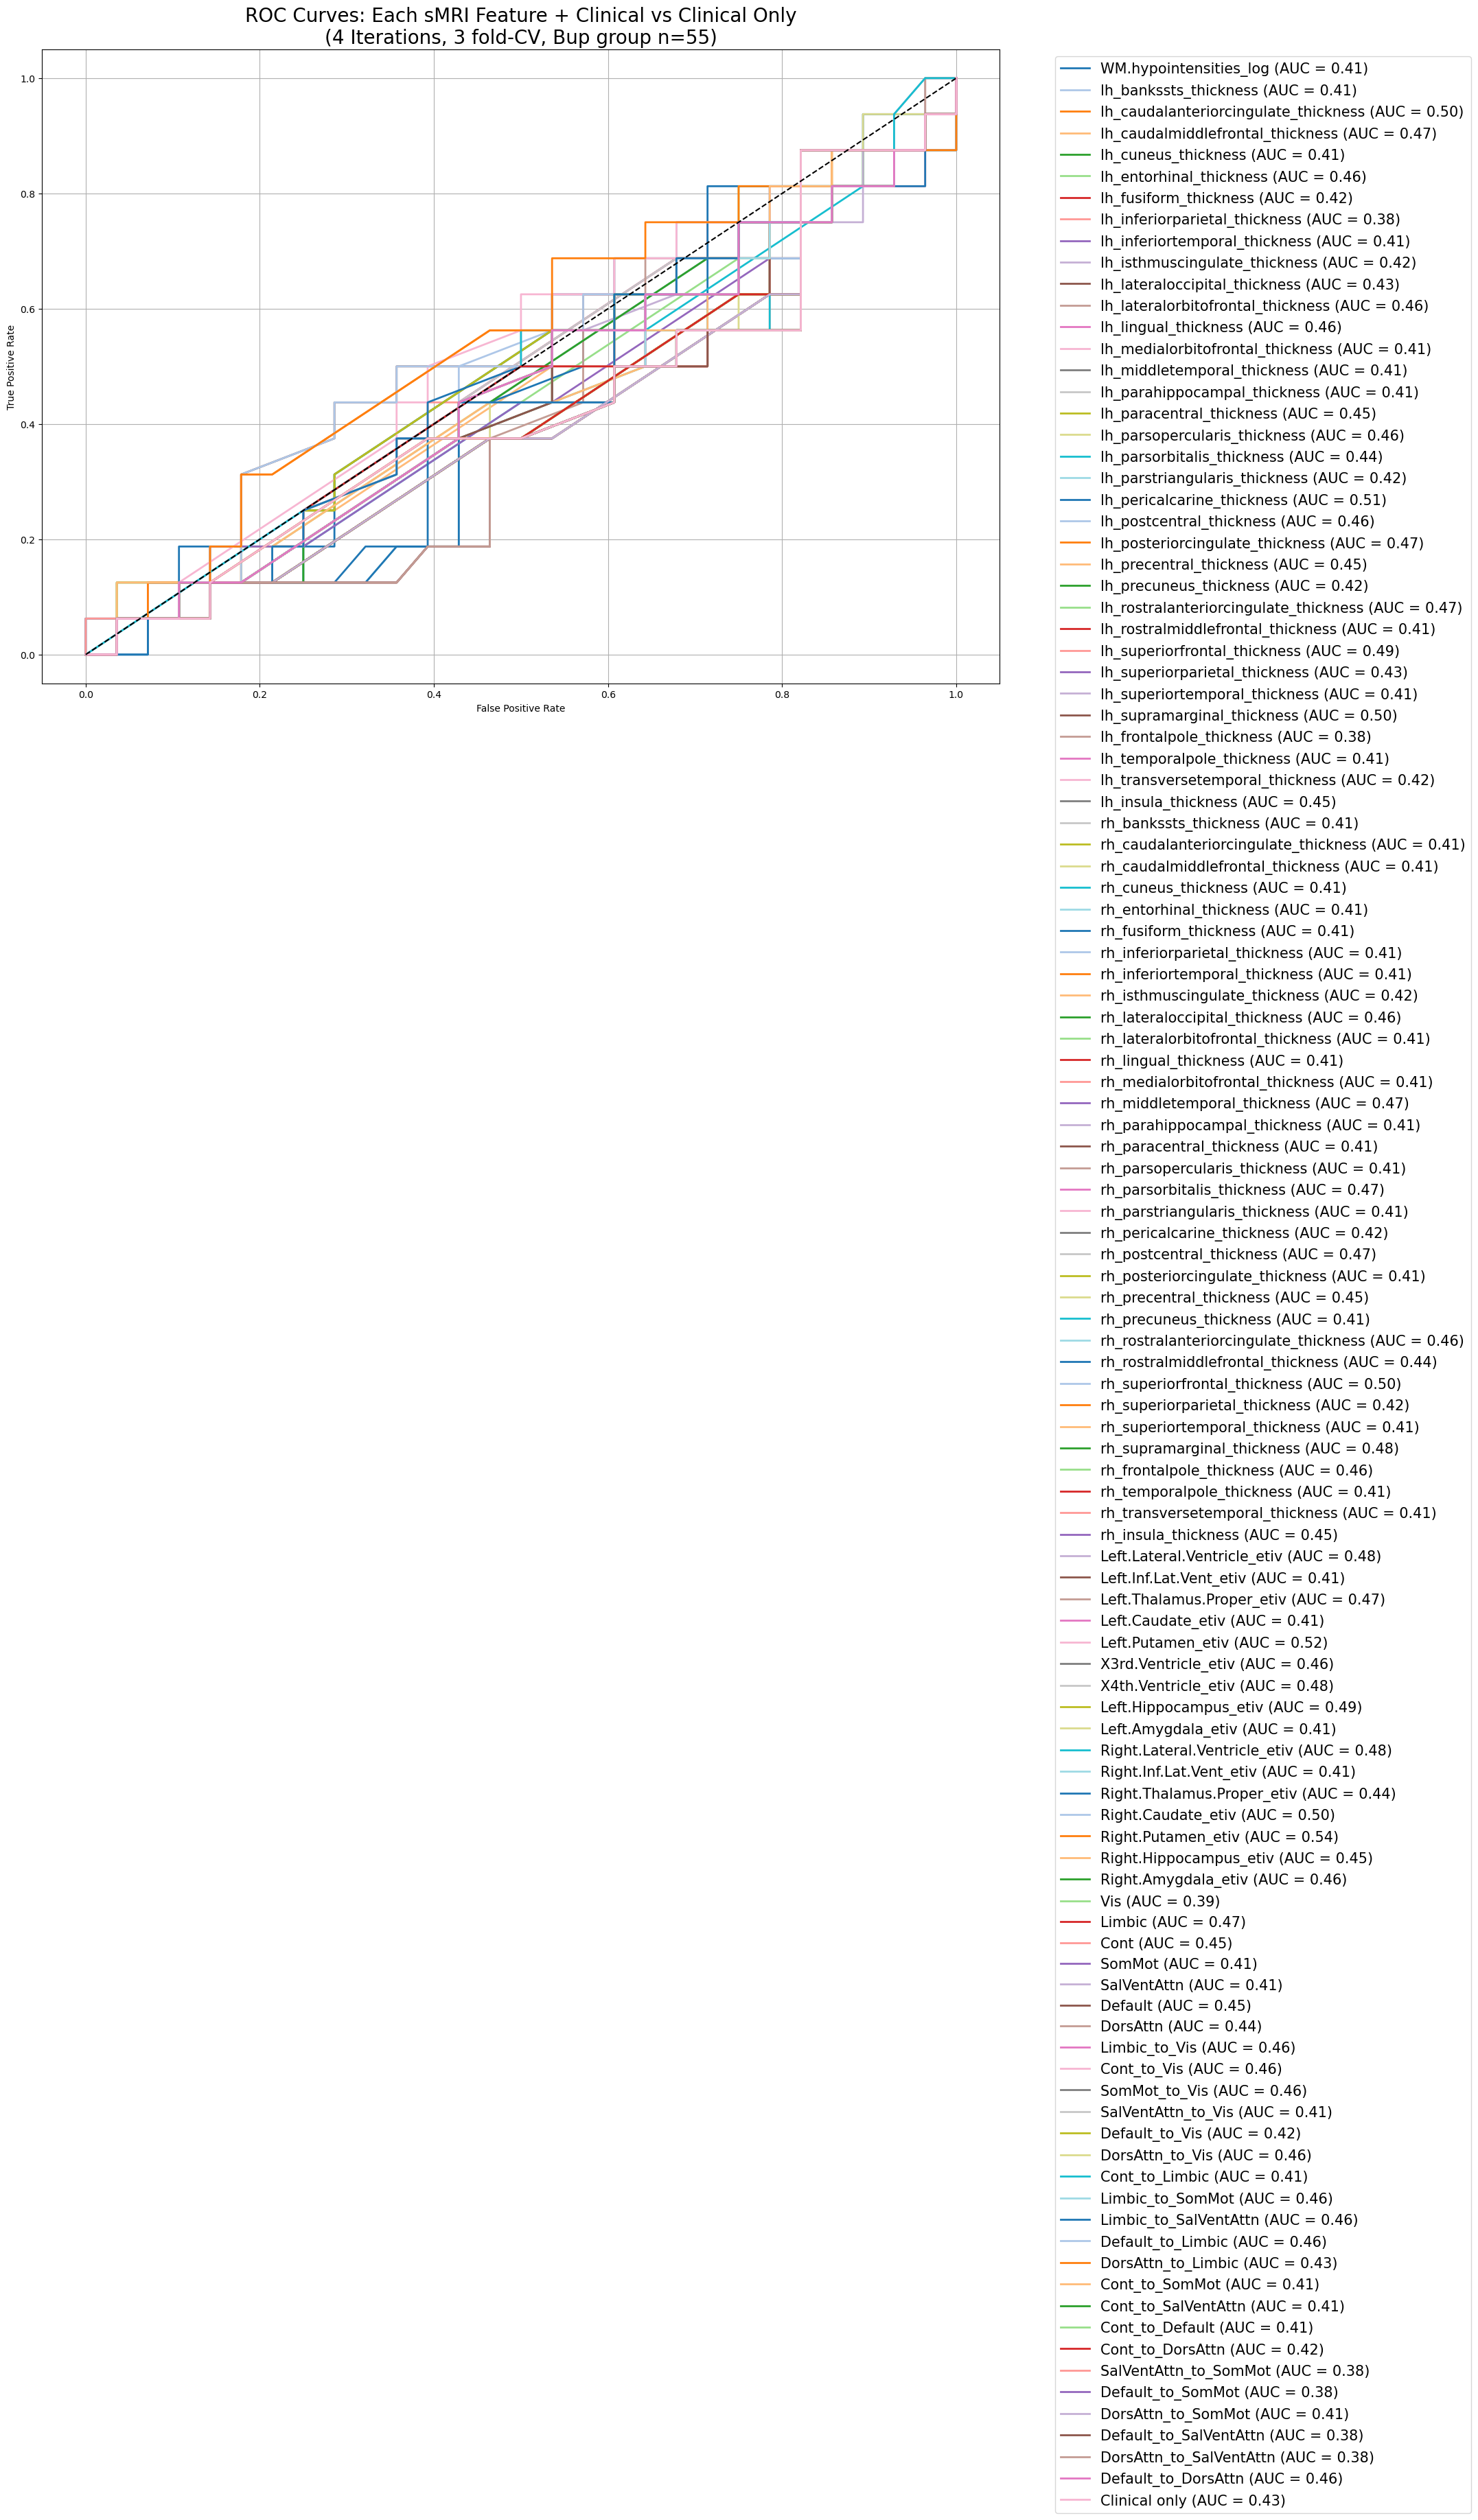

In [71]:

# Plot all ROC curves
plt.figure(figsize=(18, 12))
from itertools import cycle
colors = cycle(plt.cm.tab20.colors)

for feature_name, result in roc_results.items():
    plt.plot(result['fpr'], result['tpr'],
             label=f'{feature_name} (AUC = {result["auc"]:.2f})',
             linewidth=2,
             color=next(colors))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curves: Each sMRI Feature + Clinical vs Clinical Only\n({n_splits} Iterations, 3 fold-CV, Bup group n={len(df)})', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# turn roc_results into a df and sort by auc
roc_df = pd.DataFrame([
    {'Feature': feature, 'AUC': result['auc']}
    for feature, result in roc_results.items()
]).sort_values(by='AUC', ascending=False)


Pooled AUC: 0.750

Average per-fold metrics:
Accuracy       0.642500
Sensitivity    0.766667
Specificity    0.589286
AUC            0.761071
dtype: float64


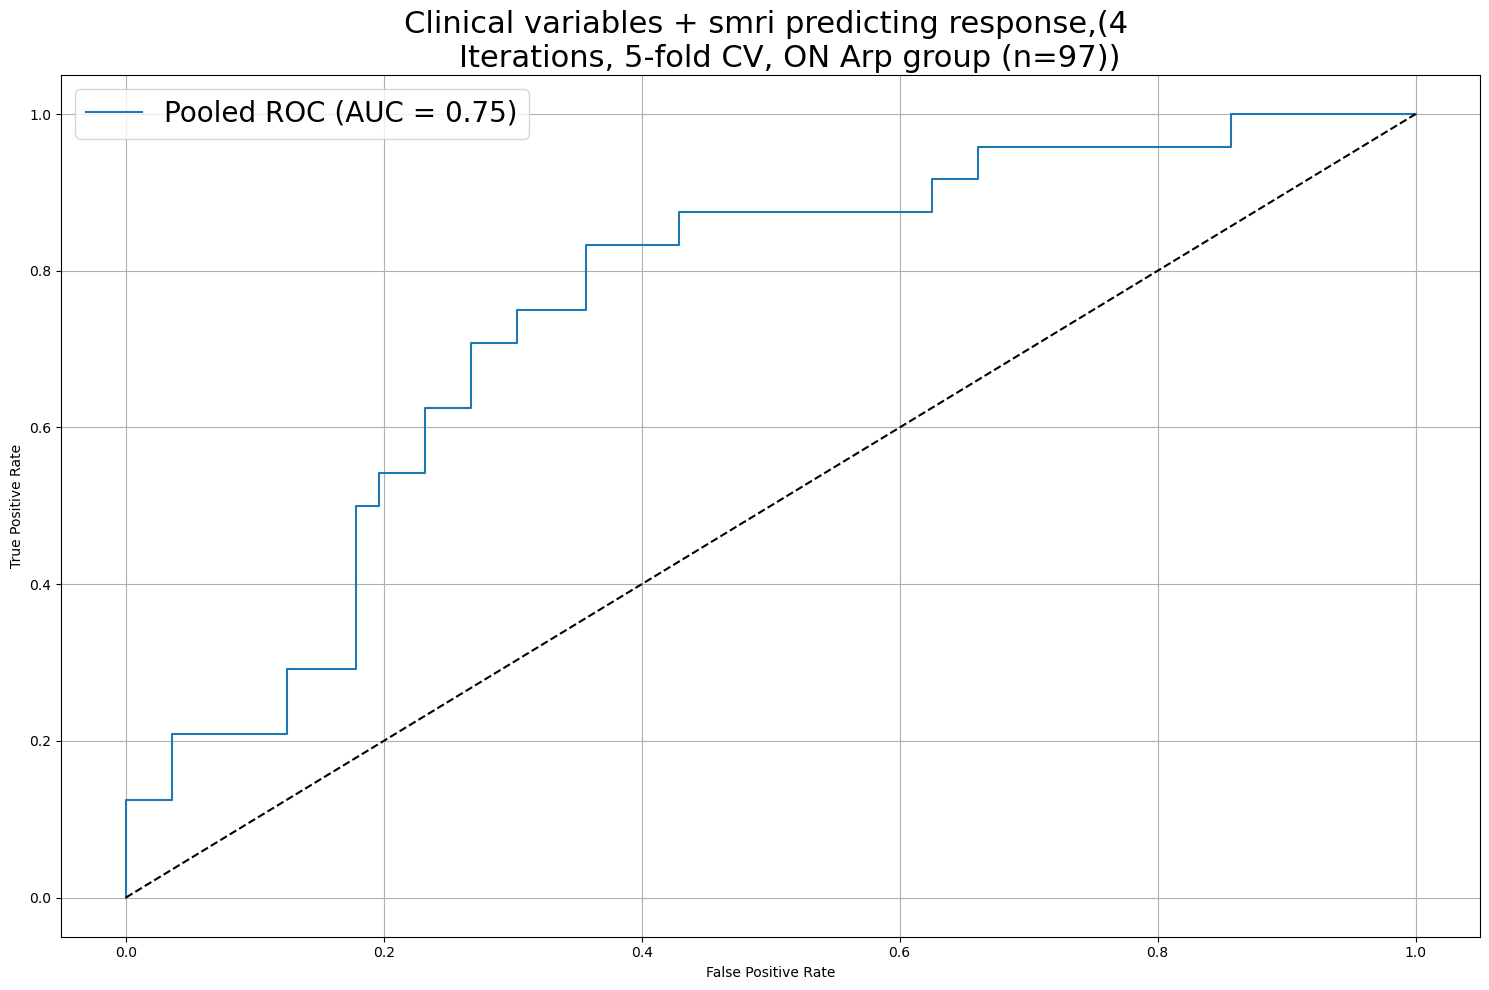

In [355]:

#  pooled results
pooled_auc = roc_auc_score(all_y_true, all_y_scores)
fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)

print(f"\nPooled AUC: {pooled_auc:.3f}")
print("\nAverage per-fold metrics:")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].mean())

plt.figure(figsize=(15, 10))
# make the font for pooled ROC larger

plt.plot(fpr, tpr, label=f'Pooled ROC (AUC = {pooled_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title(
    f"""Clinical variables + smri predicting response,({n_splits} 
    Iterations, 5-fold CV, ON Arp group (n={len(df)}))""",
    fontsize=22
)

plt.legend(fontsize=20)  
plt.grid(True)
plt.tight_layout()
plt.show()
